In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [2]:
X = []
Y = []
Labels = []
Dictionary_Y = {}
Dictionary_Y_Size = 0

df = pd.read_csv(r'/Users/coco/Desktop/CS677 Final project/Crop_recommendation.csv')
for index, row in df.iterrows():
    label = row[7]
    try:
        Dictionary_Y[label]
    except:
        Labels.append(label)
        Dictionary_Y[label] = Dictionary_Y_Size
        Dictionary_Y_Size += 1
    X.append([row[0], row[1], row[2], row[3], row[4], row[5], row[6]])
    Y.append(label)
print(df['label'].value_counts())

rice           100
chickpea       100
banana         100
apple          100
coffee         100
mungbean       100
mothbeans      100
coconut        100
pomegranate    100
papaya         100
watermelon     100
grapes         100
pigeonpeas     100
kidneybeans    100
jute           100
blackgram      100
muskmelon      100
orange         100
mango          100
cotton         100
maize          100
lentil         100
Name: label, dtype: int64


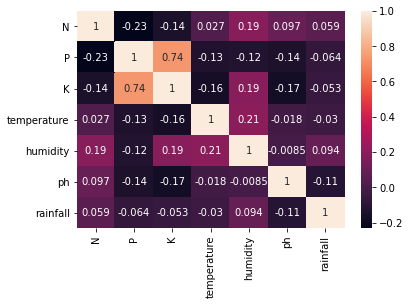

In [3]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [4]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.3, random_state=2)

NaiveBayes = GaussianNB()
NaiveBayes.fit(Xtrain, Ytrain)
predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
print("Accuracy is: ", x)
print(classification_report(Ytest, predicted_values))

Accuracy is:  0.9924242424242424
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        26
   blackgram       1.00      1.00      1.00        28
    chickpea       1.00      1.00      1.00        29
     coconut       1.00      1.00      1.00        31
      coffee       1.00      1.00      1.00        33
      cotton       1.00      1.00      1.00        31
      grapes       1.00      1.00      1.00        29
        jute       0.89      0.97      0.93        33
 kidneybeans       1.00      1.00      1.00        30
      lentil       1.00      1.00      1.00        32
       maize       1.00      1.00      1.00        32
       mango       1.00      1.00      1.00        33
   mothbeans       1.00      1.00      1.00        29
    mungbean       1.00      1.00      1.00        32
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00      1.00     

In [11]:
print("Please input Nitrogen、Phosphorous、Pottasium 、temperature、humidity、ph、rainfall")
N, P, K, temperature, humidity, ph, rainfall = map(float, input().split())
print("We recommend you to plant " + NaiveBayes.predict([[N, P, K, temperature, humidity, ph, rainfall]])[0])

Please input Nitrogen、Phosphorous、Pottasium 、temperature、humidity、ph、rainfall
90 42 43 20.87974371 82.00274423 6.502985292000001 202.9355362
We recommend you to plant rice


In [6]:
SVM = SVC(kernel='poly')
SVM.fit(Xtrain, Ytrain)
predicted_values = SVM.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
print("Poly SVM's recommend accuracy is: : ", x)
print(classification_report(Ytest, predicted_values))

Poly SVM's recommend accuracy is: :  0.9833333333333333
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        26
   blackgram       0.97      1.00      0.98        28
    chickpea       1.00      1.00      1.00        29
     coconut       1.00      1.00      1.00        31
      coffee       1.00      1.00      1.00        33
      cotton       0.97      1.00      0.98        31
      grapes       1.00      1.00      1.00        29
        jute       0.88      0.88      0.88        33
 kidneybeans       0.97      1.00      0.98        30
      lentil       1.00      1.00      1.00        32
       maize       1.00      0.97      0.98        32
       mango       1.00      1.00      1.00        33
   mothbeans       1.00      0.97      0.98        29
    mungbean       1.00      1.00      1.00        32
   muskmelon       1.00      1.00      1.00        30
      orange       1.00  

In [7]:
print("Please input Nitrogen、Phosphorous、Pottasium 、temperature、humidity、ph、rainfall")
N, P, K, temperature, humidity, ph, rainfall = map(float, input().split())
print("We recommend you to plant " + SVM.predict([[N, P, K, temperature, humidity, ph, rainfall]])[0])

Please input Nitrogen、Phosphorous、Pottasium 、temperature、humidity、ph、rainfall
90 42 43 20.87974371 82.00274423 6.502985292000001 202.9355362
We recommend you to plant rice


DecisionTrees's Accuracy is:  97.12121212121212
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        26
   blackgram       0.85      1.00      0.92        28
    chickpea       1.00      1.00      1.00        29
     coconut       0.91      1.00      0.95        31
      coffee       1.00      1.00      1.00        33
      cotton       1.00      0.97      0.98        31
      grapes       1.00      1.00      1.00        29
        jute       0.87      1.00      0.93        33
 kidneybeans       1.00      1.00      1.00        30
      lentil       0.85      0.91      0.88        32
       maize       0.97      1.00      0.98        32
       mango       1.00      1.00      1.00        33
   mothbeans       1.00      0.76      0.86        29
    mungbean       1.00      1.00      1.00        32
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00

[Text(242.32500000000002, 207.55636363636364, 'X[1] <= 107.5\ngini = 0.954\nsamples = 1540\nvalue = [72, 74, 72, 71, 69, 67, 69, 71, 67, 70, 68, 68\n67, 71, 68, 70, 58, 70, 69, 81, 70, 78]'),
 Text(220.72500000000002, 187.7890909090909, 'X[2] <= 65.0\ngini = 0.95\nsamples = 1397\nvalue = [0, 74, 72, 71, 69, 67, 69, 0, 67, 70, 68, 68\n67, 71, 68, 70, 58, 70, 69, 81, 70, 78]'),
 Text(209.925, 168.0218181818182, 'X[4] <= 27.685\ngini = 0.947\nsamples = 1326\nvalue = [0, 74, 72, 0, 69, 67, 69, 0, 67, 70, 68, 68\n67, 71, 68, 70, 58, 70, 69, 81, 70, 78]'),
 Text(199.125, 148.25454545454545, 'gini = 0.0\nsamples = 70\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 70, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(220.72500000000002, 148.25454545454545, 'X[6] <= 30.393\ngini = 0.944\nsamples = 1256\nvalue = [0, 74, 72, 0, 69, 67, 69, 0, 67, 0, 68, 68, 67\n71, 68, 70, 58, 70, 69, 81, 70, 78]'),
 Text(209.925, 128.48727272727274, 'gini = 0.0\nsamples = 70\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n

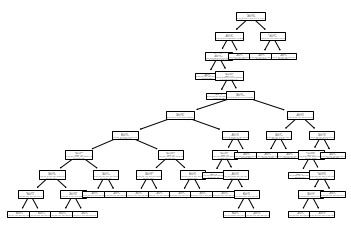

In [8]:
DecisionTree = DecisionTreeClassifier(criterion="gini",splitter='best',random_state=2,max_depth=10)
DecisionTree.fit(Xtrain,Ytrain)
Ypredict = DecisionTree.predict(Xtest)
print("DecisionTrees's Accuracy is: ", metrics.accuracy_score(Ytest, Ypredict)*100)
print(classification_report(Ytest,Ypredict))
tree.plot_tree(DecisionTree)

In [9]:
print("Please input Nitrogen、Phosphorous、Pottasium 、temperature、humidity、ph、rainfall")
N, P, K, temperature, humidity, ph, rainfall = map(float, input().split())
print("We recommend you to plant " + DecisionTree.predict([[N, P, K, temperature, humidity, ph, rainfall]])[0])

Please input Nitrogen、Phosphorous、Pottasium 、temperature、humidity、ph、rainfall
90 42 43 20.87974371 82.00274423 6.502985292000001 202.9355362
We recommend you to plant rice
